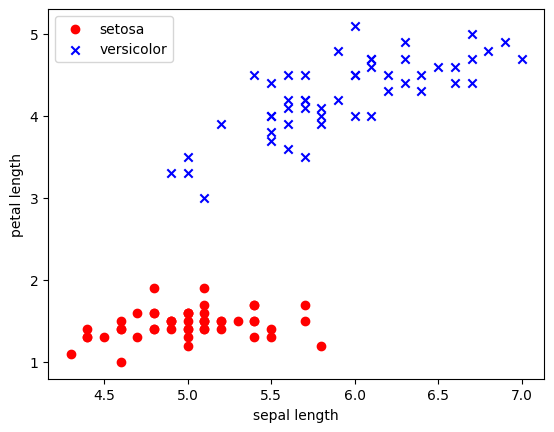

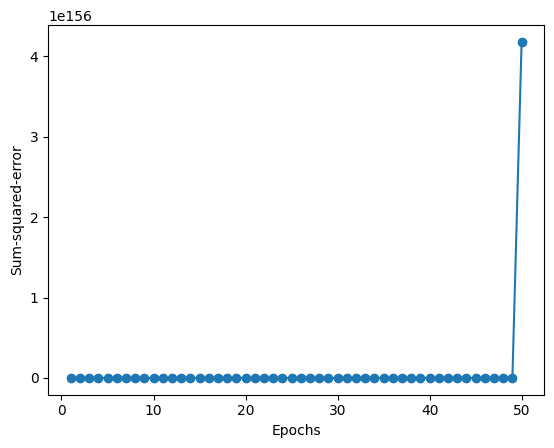

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


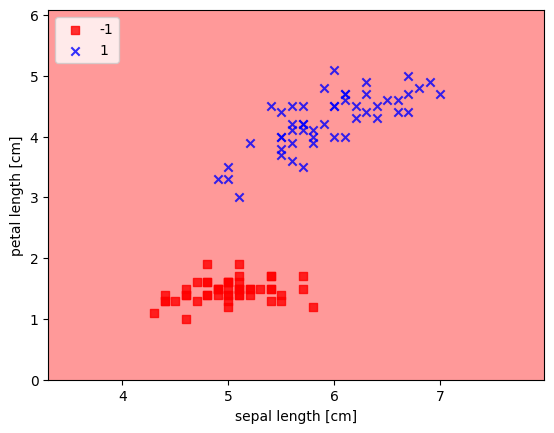

In [2]:
# Importing dependencies.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

# Creation of the main Adaline object.
class Adaline(object):
    # Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.01, Iterations=50):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.cost_ = []
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.learn_rate * x.T.dot(errors)
            self.weights[0] += self.learn_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Activation method for linear activation.
    def activation(self, x):
        return x
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

# Data retrieval and preparation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[0:100, [0, 2]].values  # Selecting the first 100 rows and the first and third columns.
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

y = y.iloc[0:100, 4].values  # Selecting the first 100 rows and the fifth column.
y = np.where(y == 'Iris-setosa', -1, 1)

# Model training and evaluation.
Classifier = Adaline(Learn_Rate=0.01, Iterations=50)
Classifier.fit(x, y)
plt.plot(range(1, len(Classifier.cost_) + 1), Classifier.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the Adaline model.
plot_decision_regions(x, y, classifier=Classifier)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
